In [1]:
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np   # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Library visualisasi data yang lebih interaktif
import math

from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Untuk preprocessing data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrik evaluasi
from sklearn.tree import DecisionTreeClassifier  # Contoh model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Contoh model Random Forest
from sklearn.linear_model import LogisticRegression  # Contoh model Logistic Regression


In [2]:
df = pd.read_csv('Clicked_Ads_Dataset.csv')

In [3]:
df.sample(10, random_state=100)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
249,249,62.20,25,177857470.0,161.16,Perempuan,4/24/2016 13:42,Yes,Surabaya,Jawa Timur,Food
353,353,79.54,44,493448200.0,217.68,Laki-Laki,1/5/2016 16:34,No,Tangerang Selatan,Banten,Health
537,537,61.72,26,470953420.0,218.49,Perempuan,2/14/2016 7:15,No,Surabaya,Jawa Timur,House
424,424,43.59,36,411948390.0,132.31,Laki-Laki,5/26/2016 13:43,Yes,Jakarta Utara,Daerah Khusus Ibukota Jakarta,House
564,564,64.75,36,441007210.0,117.66,Perempuan,4/6/2016 1:19,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel
124,124,62.33,43,481509630.0,127.11,Perempuan,6/21/2016 13:15,Yes,Bandar Lampung,Lampung,Furniture
492,492,59.88,30,528745980.0,193.63,Laki-Laki,3/2/2016 5:11,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Furniture
553,553,44.73,35,387218790.0,127.56,Laki-Laki,1/27/2016 18:25,Yes,Cimahi,Jawa Barat,Travel
982,982,54.37,38,505374030.0,140.77,Perempuan,6/25/2016 18:17,Yes,Tangerang,Banten,Otomotif
935,935,83.98,36,478141370.0,194.62,Perempuan,2/24/2016 0:44,No,Malang,Jawa Timur,Otomotif


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
num_cols = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
cat_cols = [col for col in df.columns if col not in num_cols]
df[cat_cols] = df[cat_cols].astype(object)

In [7]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


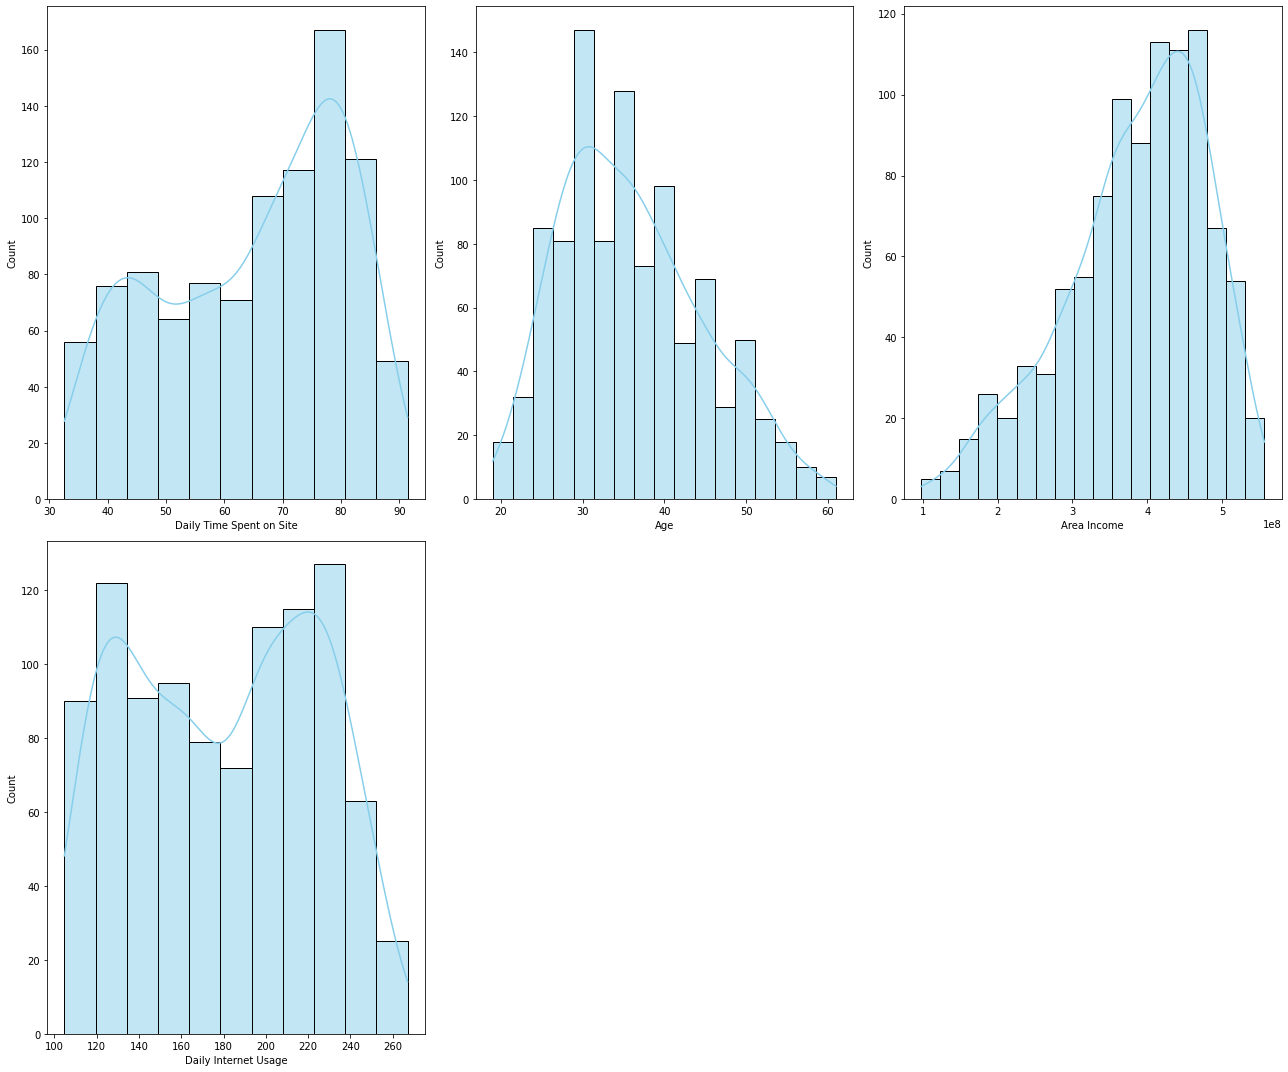

In [8]:
num_cols_count = len(num_cols)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

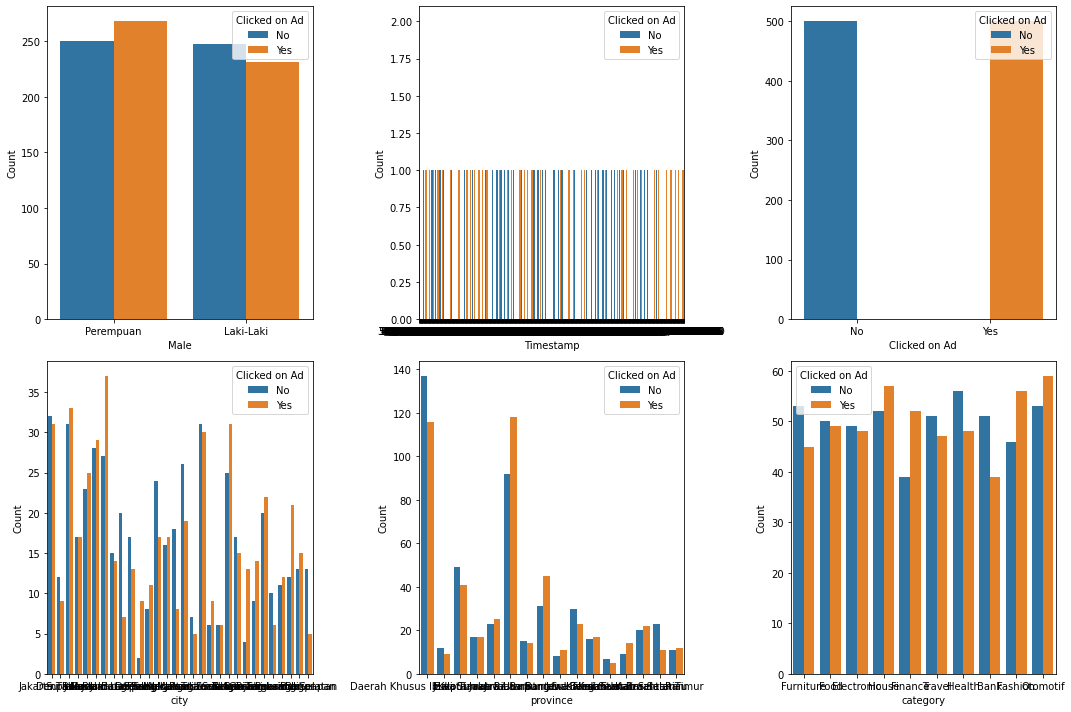

In [9]:
# Univariate analysis for categorical columns
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols - 1) // 3 + 1
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, data=df, hue=df['Clicked on Ad'])
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

Male
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Timestamp
5/26/2016 15:40    2
5/20/2016 12:17    2
5/30/2016 8:02     2
2/22/2016 7:04     1
2/28/2016 22:02    1
                  ..
5/13/2016 11:57    1
4/25/2016 16:58    1
3/21/2016 8:13     1
2/10/2016 13:46    1
1/5/2016 11:53     1
Name: Timestamp, Length: 997, dtype: int64

Clicked on Ad
Yes    500
No     500
Name: Clicked on Ad, dtype: int64

city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           1

In [11]:
df[cat_cols].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,Yes,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


### Customer Type and Behaviour Analysis on Advertisement

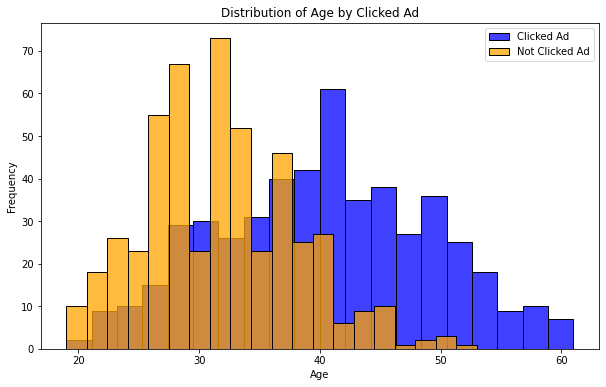

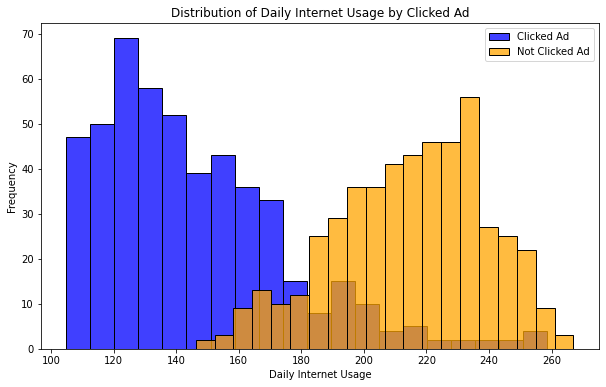

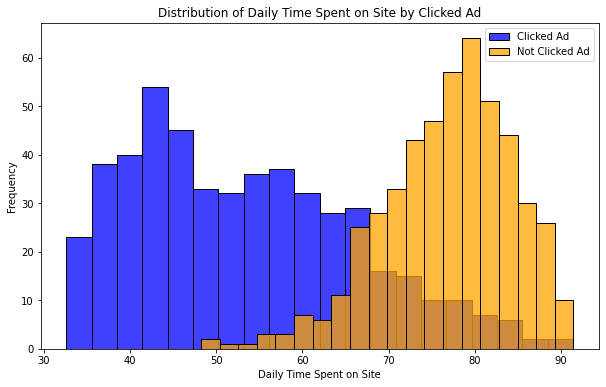

In [12]:
# Memisahkan data berdasarkan klik iklan
clicked_ads = df[df['Clicked on Ad'] == 'Yes']
not_clicked_ads = df[df['Clicked on Ad'] == 'No']

# Definisikan kolom-kolom yang akan dianalisis
columns_to_analyze = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']

# Loop melalui setiap kolom untuk membuat histogram
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(clicked_ads[col], label='Clicked Ad', color='blue', bins=20)
    sns.histplot(not_clicked_ads[col], label='Not Clicked Ad', color='orange', bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {col} by Clicked Ad')
    plt.show()

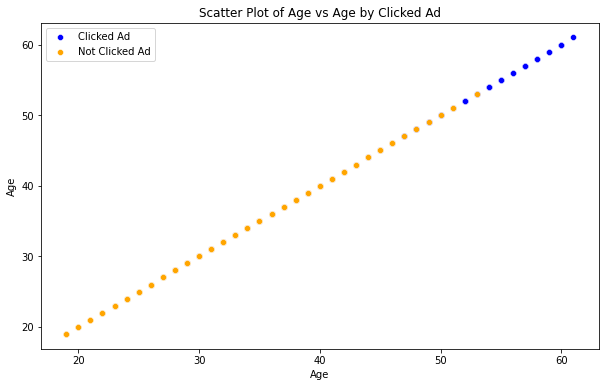

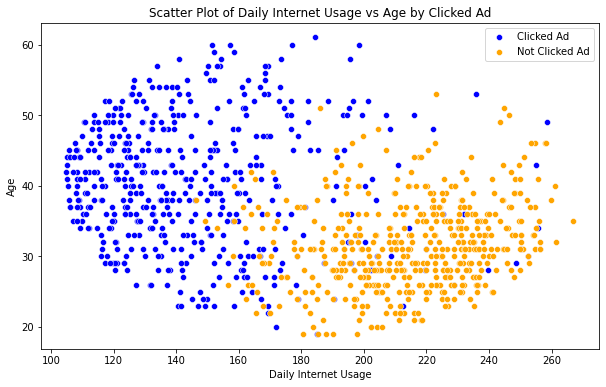

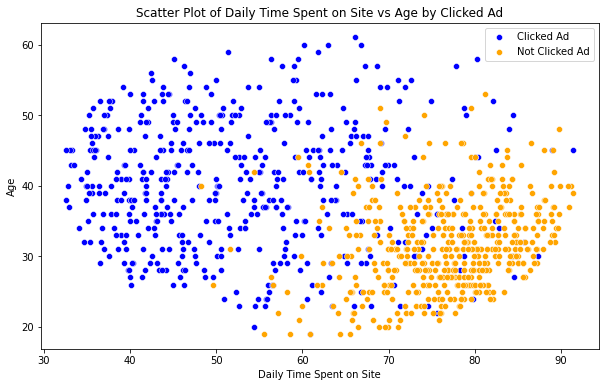

In [13]:
# Loop melalui setiap kolom dan buat scatter plot
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='Age', data=clicked_ads, label='Clicked Ad', color='blue')
    sns.scatterplot(x=col, y='Age', data=not_clicked_ads, label='Not Clicked Ad', color='orange')
    plt.xlabel(col)
    plt.ylabel('Age')
    plt.legend()
    plt.title(f'Scatter Plot of {col} vs Age by Clicked Ad')
    plt.show()


In [14]:
# Hitung matriks korelasi
correlation_matrix = df[num_cols].corr()

# Tampilkan matriks korelasi
print(correlation_matrix)


                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331424     0.308266   
Age                                      -0.331424  1.000000    -0.179343   
Area Income                               0.308266 -0.179343     1.000000   
Daily Internet Usage                      0.518294 -0.370481     0.338080   

                          Daily Internet Usage  
Daily Time Spent on Site              0.518294  
Age                                  -0.370481  
Area Income                           0.338080  
Daily Internet Usage                  1.000000  


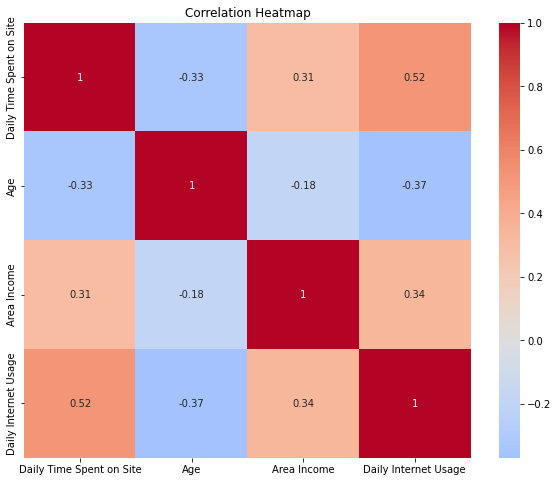

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning

In [16]:
# Mengubah nama kolom 'Male' menjadi 'Gender'
df.rename(columns={'Male': 'Gender'}, inplace=True)

### Missing Value

In [17]:
# Menghitung presentase nilai yang hilang pada setiap kolom
missing_percentage = (df.isnull().mean() * 100).round(2)

# Tampilkan presentase nilai yang hilang pada tiap kolom
print("Presentase Missing Values pada Tiap Kolom:")
print(missing_percentage)

Presentase Missing Values pada Tiap Kolom:
Daily Time Spent on Site    1.3
Age                         0.0
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64


In [18]:
# Hapus baris dengan nilai yang hilang pada kolom 'Male'
cleaned_df = df.dropna(subset=['Gender'])

# Isi nilai yang hilang dengan rata-rata pada kolom 'Daily Time Spent on Site', 'Area Income', dan 'Daily Internet Usage'
num_cols_to_fill = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']
cleaned_df[num_cols_to_fill] = cleaned_df[num_cols_to_fill].fillna(cleaned_df[num_cols_to_fill].mean())


c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
# Menghitung presentase nilai yang hilang pada setiap kolom setelah pembersihan
missing_percentage_after_cleaning = (cleaned_df.isnull().mean() * 100).round(2)

# Tampilkan presentase nilai yang hilang pada tiap kolom setelah pembersihan
print("Presentase Missing Values pada Tiap Kolom Setelah Pembersihan:")
print(missing_percentage_after_cleaning)


Presentase Missing Values pada Tiap Kolom Setelah Pembersihan:
Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Gender                      0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64


In [20]:
# Hapus baris yang diduplikasi
cleaned_df = cleaned_df.drop_duplicates()

# Periksa apakah masih ada nilai yang diduplikasi setelah pembersihan
print(cleaned_df.duplicated().sum())


0


### Feature Encoding

In [21]:
# Kolom yang akan diencode dengan One-Hot Encoding
onehot_encode_cols = ['Gender', 'city', 'province', 'category']

# Lakukan One-Hot Encoding pada kolom kategorikal
cleaned_df = pd.get_dummies(cleaned_df, columns=onehot_encode_cols, drop_first=True)

cleaned_df['Clicked on Ad'] = cleaned_df['Clicked on Ad'].map({'No': 0, 'Yes': 1})

print(cleaned_df)


     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                   68.950000   35  432837300.0                256.09   
1                   80.230000   31  479092950.0                193.77   
2                   69.470000   26  418501580.0                236.50   
3                   74.150000   29  383643260.0                245.89   
4                   68.370000   35  517229930.0                225.58   
..                        ...  ...          ...                   ...   
995                 72.970000   30  499691990.0                208.58   
996                 51.300000   45  474475190.0                134.42   
997                 64.902419   51  296910040.0                120.37   
998                 55.550000   19  293445530.0                187.95   
999                 45.010000   26  209130600.0                178.35   

           Timestamp  Clicked on Ad  Gender_Perempuan  city_Bandar Lampung  \
0     3/27/2016 0:53              0          

In [22]:
# Konversi kolom 'Timestamp' ke tipe data datetime
cleaned_df['Timestamp'] = pd.to_datetime(cleaned_df['Timestamp'])

# Ekstraksi informasi waktu ke kolom baru
cleaned_df['Year'] = cleaned_df['Timestamp'].dt.year
cleaned_df['Month'] = cleaned_df['Timestamp'].dt.month
cleaned_df['Week'] = cleaned_df['Timestamp'].dt.week
cleaned_df['Day'] = cleaned_df['Timestamp'].dt.day

# Hapus kolom 'Timestamp' karena sudah tidak diperlukan lagi
cleaned_df = cleaned_df.drop(columns=['Timestamp'])

# Tampilkan dataset setelah ekstraksi waktu
print(cleaned_df)


     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                   68.950000   35  432837300.0                256.09   
1                   80.230000   31  479092950.0                193.77   
2                   69.470000   26  418501580.0                236.50   
3                   74.150000   29  383643260.0                245.89   
4                   68.370000   35  517229930.0                225.58   
..                        ...  ...          ...                   ...   
995                 72.970000   30  499691990.0                208.58   
996                 51.300000   45  474475190.0                134.42   
997                 64.902419   51  296910040.0                120.37   
998                 55.550000   19  293445530.0                187.95   
999                 45.010000   26  209130600.0                178.35   

     Clicked on Ad  Gender_Perempuan  city_Bandar Lampung  city_Bandung  \
0                0                 1            

c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [23]:
from sklearn.model_selection import train_test_split

# Pilih kolom 'Clicked on Ad' sebagai target
target_column = 'Clicked on Ad'
target = cleaned_df[target_column]

# Pilih sisanya sebagai fitur
features = cleaned_df.drop(columns=[target_column])

# Bagi data menjadi data pelatihan dan data pengujian (80% train, 20% test)
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.3, random_state=42)

# Tampilkan ukuran data train dan data test
print("Jumlah Data Train:", len(train_features))
print("Jumlah Data Test:", len(test_features))


Jumlah Data Train: 697
Jumlah Data Test: 300


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Eksperimen Pertama: Tanpa Normalisasi Data
print("Eksperimen Pertama: Knn Tanpa Normalisasi Data")
knn_model = KNeighborsClassifier()
knn_model.fit(train_features, train_target)
predictions = knn_model.predict(test_features)
accuracy = accuracy_score(test_target, predictions)
print("Akurasi tanpa normalisasi:", accuracy)

Eksperimen Pertama: Knn Tanpa Normalisasi Data
Akurasi tanpa normalisasi: 0.64


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Eksperimen Pertama: Decision Tree tanpa Normalisasi Data
print("Eksperimen Pertama: Decision Tree tanpa Normalisasi Data")
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(train_features, train_target)
predictions_tree = decision_tree_model.predict(test_features)
accuracy_tree = accuracy_score(test_target, predictions_tree)
print("Akurasi Decision Tree tanpa normalisasi:", accuracy_tree)


Eksperimen Pertama: Decision Tree tanpa Normalisasi Data
Akurasi Decision Tree tanpa normalisasi: 0.9366666666666666


In [28]:
# Eksperimen Kedua: Dengan Normalisasi Data
print("\nEksperimen Kedua: Knn Dengan Normalisasi Data")
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

knn_model_normalized = KNeighborsClassifier()
knn_model_normalized.fit(train_features_scaled, train_target)
predictions_normalized = knn_model_normalized.predict(test_features_scaled)
accuracy_normalized = accuracy_score(test_target, predictions_normalized)
print("Akurasi dengan Normalisasi:", accuracy_normalized)


Eksperimen Kedua: Knn Dengan Normalisasi Data
Akurasi dengan Normalisasi: 0.8033333333333333


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Eksperimen Kedua: Decision Tree dengan Normalisasi Data
print("\nEksperimen Kedua: Decision Tree dengan Normalisasi Data")
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

decision_tree_model_normalized = DecisionTreeClassifier(random_state=42)
decision_tree_model_normalized.fit(train_features_scaled, train_target)
predictions_tree_normalized = decision_tree_model_normalized.predict(test_features_scaled)
accuracy_tree_normalized = accuracy_score(test_target, predictions_tree_normalized)
print("Akurasi Decision Tree dengan normalisasi:", accuracy_tree_normalized)



Eksperimen Kedua: Decision Tree dengan Normalisasi Data
Akurasi Decision Tree dengan normalisasi: 0.9366666666666666


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix untuk model Decision Tree dengan normalisasi
conf_matrix = confusion_matrix(test_target, predictions_tree_normalized)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[134  10]
 [  9 147]]


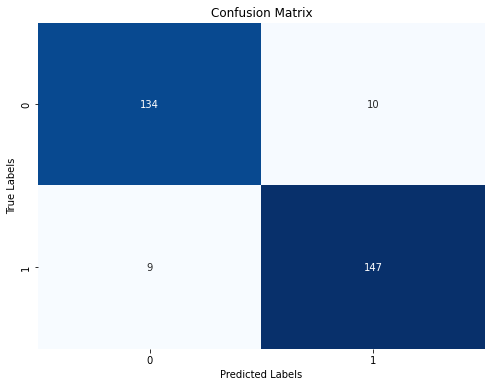

In [32]:
# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


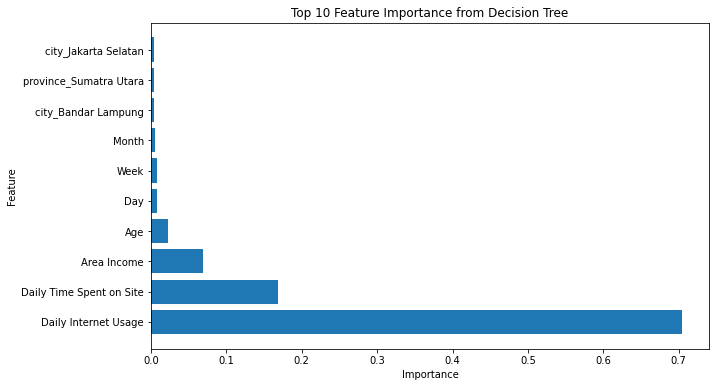

In [34]:
# Mengambil fitur-fitur dari DataFrame setelah one-hot encoding
encoded_features = cleaned_df.drop(columns=['Clicked on Ad'])

# Membuat model Decision Tree dengan normalisasi (seperti yang telah Anda lakukan sebelumnya)
decision_tree_model_normalized = DecisionTreeClassifier(random_state=42)
decision_tree_model_normalized.fit(train_features_scaled, train_target)

# Menampilkan tingkat kepentingan fitur dari model
feature_importances = decision_tree_model_normalized.feature_importances_

# Membuat DataFrame untuk tingkat kepentingan fitur dan nama fitur
importances_df = pd.DataFrame({'Feature': encoded_features.columns, 'Importance': feature_importances})

# Mengurutkan DataFrame berdasarkan tingkat kepentingan fitur
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Mengambil 10 fitur teratas
top_10_importances = importances_df.head(10)

# Menampilkan tingkat kepentingan fitur dalam bentuk bar plot (10 teratas)
plt.figure(figsize=(10, 6))
plt.barh(top_10_importances['Feature'], top_10_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance from Decision Tree')
plt.show()



In [35]:
top_features = importances_df.head(2)['Feature'].tolist()
print("2 Fitur Utama:", top_features)

2 Fitur Utama: ['Daily Internet Usage', 'Daily Time Spent on Site']


# Business Recommendation

1. Optimalkan Konten yang Menarik di Situs Web:
Karena pengguna yang menghabiskan lebih banyak waktu di situs web cenderung lebih mungkin untuk mengklik iklan, Anda dapat mengoptimalkan konten yang menarik dan relevan di situs web Anda. Pastikan bahwa halaman-halaman yang paling sering dikunjungi oleh pengguna memiliki konten yang informatif dan menarik.

2. Segmentasi Pengguna berdasarkan Interaksi dengan Iklan:
Anda dapat melakukan segmentasi pengguna berdasarkan seberapa sering mereka mengklik iklan dan berapa lama waktu yang mereka habiskan di situs web. Ini dapat membantu Anda mengidentifikasi kelompok pengguna yang paling responsif terhadap iklan dan konten tertentu. Dengan pemahaman yang lebih baik tentang preferensi pengguna, Anda dapat mengirimkan penawaran yang lebih relevan.

3. Promosi Khusus untuk Pengguna yang Menghabiskan Sedikit Waktu Online:
Anda dapat merancang promosi khusus untuk pengguna yang menghabiskan sedikit waktu online. Mungkin mereka lebih suka mendapatkan penawaran langsung melalui email atau pesan teks daripada mengandalkan iklan di situs web.

In [36]:
jumlah_pengguna = 1000
biaya_pemasaran = 5000
conversion_rate_tanpa_ml = 0.10
pendapatan_per_konversi = 50

konversi_tanpa_ml = jumlah_pengguna * conversion_rate_tanpa_ml
revenue_tanpa_ml = konversi_tanpa_ml * pendapatan_per_konversi
profit_tanpa_ml = revenue_tanpa_ml - biaya_pemasaran

print("Simulasi Tanpa Model Machine Learning:")
print("Jumlah Pengguna:", jumlah_pengguna)
print("Biaya Pemasaran:", biaya_pemasaran)
print("Konversi (Tanpa Model ML):", konversi_tanpa_ml)
print("Pendapatan (Tanpa Model ML):", revenue_tanpa_ml)
print("Profit (Tanpa Model ML):", profit_tanpa_ml)


Simulasi Tanpa Model Machine Learning:
Jumlah Pengguna: 1000
Biaya Pemasaran: 5000
Konversi (Tanpa Model ML): 100.0
Pendapatan (Tanpa Model ML): 5000.0
Profit (Tanpa Model ML): 0.0


In [37]:
jumlah_pengguna = 1000
biaya_pemasaran = 5000
conversion_rate_dengan_ml = 0.15
pendapatan_per_konversi = 50

konversi_dengan_ml = jumlah_pengguna * conversion_rate_dengan_ml
revenue_dengan_ml = konversi_dengan_ml * pendapatan_per_konversi
profit_dengan_ml = revenue_dengan_ml - biaya_pemasaran

print("Simulasi Dengan Model Machine Learning:")
print("Jumlah Pengguna:", jumlah_pengguna)
print("Biaya Pemasaran:", biaya_pemasaran)
print("Konversi (Dengan Model ML):", konversi_dengan_ml)
print("Pendapatan (Dengan Model ML):", revenue_dengan_ml)
print("Profit (Dengan Model ML):", profit_dengan_ml)


Simulasi Dengan Model Machine Learning:
Jumlah Pengguna: 1000
Biaya Pemasaran: 5000
Konversi (Dengan Model ML): 150.0
Pendapatan (Dengan Model ML): 7500.0
Profit (Dengan Model ML): 2500.0
